# RNN on IMDB for Sentiment Analysis

#### [Colah Blog for LSTM](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)
#### [Andrej Karpathy's Blog for RNN](https://karpathy.github.io/2015/05/21/rnn-effectiveness/)
#### [LSTM and GRU visualisation](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21)

In [1]:
import keras
from keras.datasets import imdb

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.preprocessing import sequence

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

Using Theano backend.


In [2]:
((X_train, y_train), (X_test, y_test)) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 23s 1us/step


In [3]:
print(len(X_train))
print(len(X_test))

25000
25000


In [5]:
print(X_train[100])
print("Label", y_train[100])

[1, 13, 244, 6, 87, 337, 7, 628, 2219, 5, 28, 285, 15, 240, 93, 23, 288, 549, 18, 1455, 673, 4, 241, 534, 3635, 8448, 20, 38, 54, 13, 258, 46, 44, 14, 13, 1241, 7258, 12, 5, 5, 51, 9, 14, 45, 6, 762, 7, 2, 1309, 328, 5, 428, 2473, 15, 26, 1292, 5, 3939, 6728, 5, 1960, 279, 13, 92, 124, 803, 52, 21, 279, 14, 9, 43, 6, 762, 7, 595, 15, 16, 2, 23, 4, 1071, 467, 4, 403, 7, 628, 2219, 8, 97, 6, 171, 3596, 99, 387, 72, 97, 12, 788, 15, 13, 161, 459, 44, 4, 3939, 1101, 173, 21, 69, 8, 401, 2, 4, 481, 88, 61, 4731, 238, 28, 32, 11, 32, 14, 9, 6, 545, 1332, 766, 5, 203, 73, 28, 43, 77, 317, 11, 4, 2, 953, 270, 17, 6, 3616, 13, 545, 386, 25, 92, 1142, 129, 278, 23, 14, 241, 46, 7, 158]
Label 0


In [6]:
word_2_index = imdb.get_word_index()

1646592/1641221 [==============================] - 29s 18us/step


In [9]:
print(len(word_2_index.items()))

88584


In [18]:
index_2_word = {value:key for (key,value) in word_2_index.items()}

In [17]:
list(index_2_word.keys())[0]

'fawn'

In [ ]:
imdb.load_data

In [67]:
' '.join([index_2_word[i] for i in X_train[22000] if i])

'the whether and itself understanding of where cruel but performance always says is quite br great improved has from too all means as on to good one which neither of awful gives in of bbc dying awesome an was one in why in for it he have offering we saw are that with his for do they an was two that gem of without something in might up doubt really was story mildly show fight kurosawa magazine annie movie but of hollywood br of on was had nothing which laughed that i i have well stupid for rats there had somebody innovative film of almost br wearing cruel run for well at is do 10 not this as liked make is had very 10 all had friend wearing cruel this as logical rats other there is him television down this explanation quick and alternately to indie shocks english and with is him offers in of down movie all walking up control in of nudity notably fundamental i i which old of on it waiting film him late spots to and without from laughable in values is explain company br being quickly this 

In [27]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [42]:
model = Sequential()

model.add(Embedding(10000, 64))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [48]:
checkpointer = ModelCheckpoint('best_model.h5',
                           monitor='val_loss',
                           verbose=1,
                           save_best_only=True,
                           save_weights_only=False,
                           mode='auto',
                           period=1
                        )
earlystopper = EarlyStopping(monitor='val_acc', patience=1)

In [49]:
hist = model.fit(X_train, y_train,
                 validation_split=0.2,
                 epochs=6,
                 batch_size=128,
                 shuffle=True,
                 verbose=1,
                 callbacks=[checkpointer, earlystopper]
                )

Train on 20000 samples, validate on 5000 samples
Epoch 1/6
20000/20000 [==============================] - 41s 2ms/step - loss: 0.2561 - acc: 0.9019 - val_loss: 0.5137 - val_acc: 0.7506

Epoch 00001: val_loss improved from inf to 0.51374, saving model to best_model.h5
Epoch 2/6
20000/20000 [==============================] - 43s 2ms/step - loss: 0.1684 - acc: 0.9386 - val_loss: 0.4198 - val_acc: 0.8308

Epoch 00002: val_loss improved from 0.51374 to 0.41982, saving model to best_model.h5
Epoch 3/6
20000/20000 [==============================] - 42s 2ms/step - loss: 0.1144 - acc: 0.9602 - val_loss: 0.3947 - val_acc: 0.8602

Epoch 00003: val_loss improved from 0.41982 to 0.39471, saving model to best_model.h5
Epoch 4/6
20000/20000 [==============================] - 45s 2ms/step - loss: 0.0693 - acc: 0.9790 - val_loss: 0.4583 - val_acc: 0.8404

Epoch 00004: val_loss did not improve from 0.39471


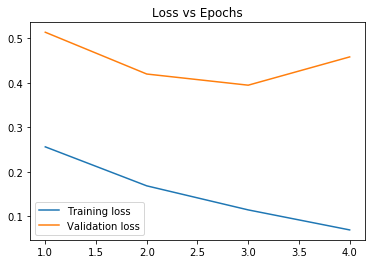

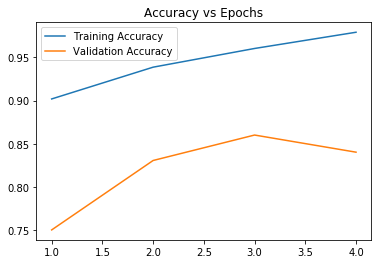

In [50]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1,len(loss)+1)
plt.title('Loss vs Epochs')
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.legend()
plt.show()

plt.title('Accuracy vs Epochs')
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
# model.save('model.h5')

In [ ]:
#model.load_weights('model_weights.h5')


In [52]:
model.evaluate(X_test, y_test)

25000/25000 [==============================] - 10s 382us/step


[0.4718303322505951, 0.832]

In [53]:
model.evaluate(X_train, y_train)

25000/25000 [==============================] - 11s 437us/step


[0.11442623583376407, 0.96384]

In [80]:
review = """In earnest, I could not be more disappointed with How To Train Your Dragon: The Hidden World. As a (former) fan of the previous two films, I expected a certain level of quality and nuance that the final film seemed to promise. In all facets, it left me disappointed. The story falls flat (with no character whatsoever) and the animation was unimaginative and one dimensionally. The plot unravels in the last 7 minutes and leaves the entire trilogy fatally undermined as a consequence. Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money Do not waste your money .
"""
review = review.lower().replace('.', '').replace(',','').replace('!','').replace(':','').replace('(', ' ').replace(')', ' ').split()
review = [word_2_index[w] for w in review if word_2_index.get(w) and word_2_index.get(w) < 10000]
review = sequence.pad_sequences([review], maxlen=500)
review

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [81]:
model.predict(review)

array([[0.05084344]], dtype=float32)